In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698606
max,1279.000000,15.095066,25.000054


In [6]:
import seaborn as sns

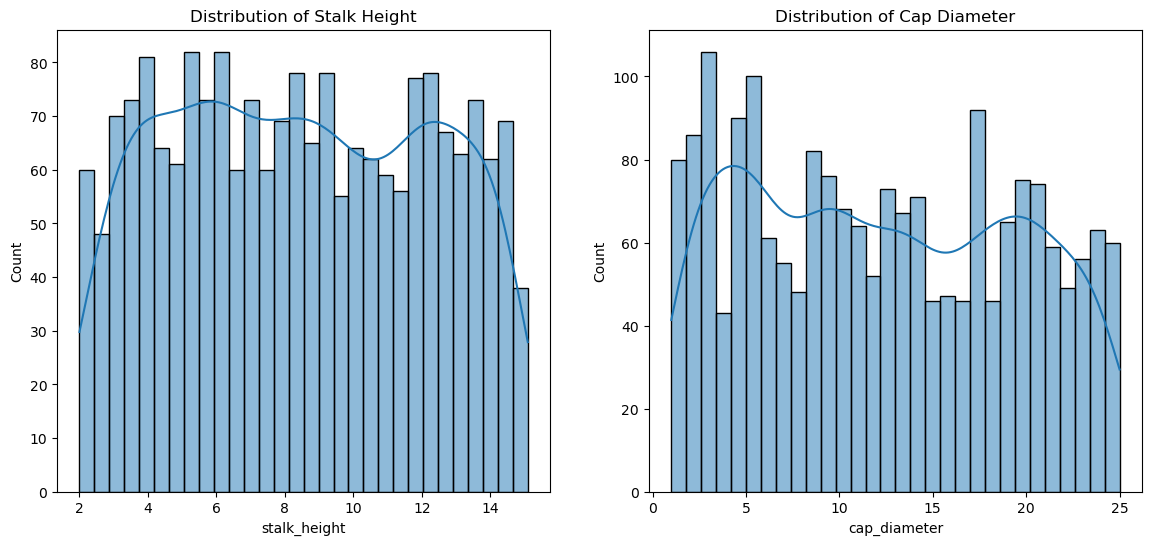

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['stalk_height'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Stalk Height')
sns.histplot(df['cap_diameter'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cap Diameter')
plt.show()

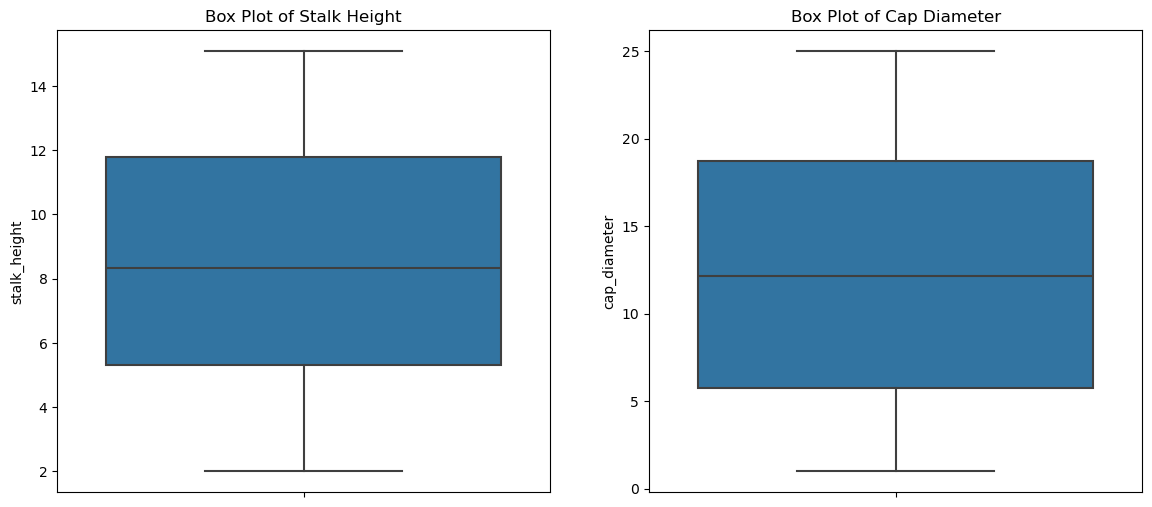

In [8]:
# Box plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=df['stalk_height'], ax=axes[0])
axes[0].set_title('Box Plot of Stalk Height')
sns.boxplot(y=df['cap_diameter'], ax=axes[1])
axes[1].set_title('Box Plot of Cap Diameter')
plt.show()

In [9]:
## inverstigate feature correlations
correlation_matrix= df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15184\2490139690.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= df.corr()


In [10]:
correlation_matrix

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.001508,0.051881
stalk_height,-0.001508,1.000000,-0.003486
cap_diameter,0.051881,-0.003486,1.000000


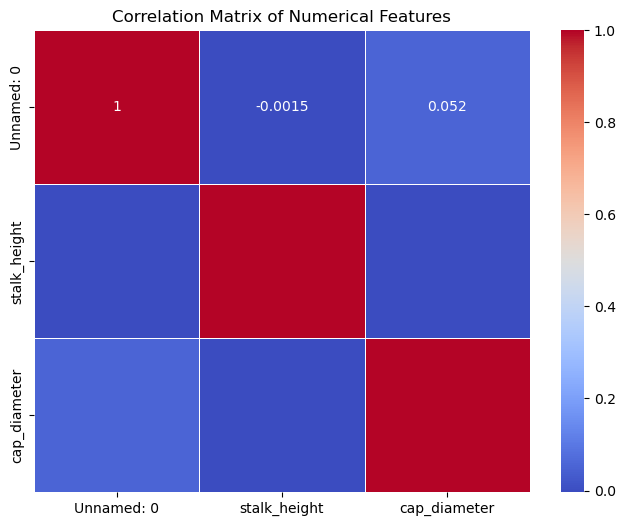

In [11]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
## data preprocessing

In [13]:
## encode categorical variables
df1=pd.get_dummies(df,dtype='int')

In [14]:
df1

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,1167,14.276173,5.054983,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1037,3.952715,19.068319,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,309,9.054265,7.205884,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,282,5.226499,20.932692,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,820,14.037532,12.545245,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,5.877891,17.464145,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1996,1160,6.500840,13.501957,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1997,265,13.558064,11.270020,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1998,411,11.092703,8.423199,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [15]:
target=df1[['class_edible']]

In [16]:
target

,class_edible
0,0
1,1
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [17]:
features= df1.drop('class_edible',axis=1)
features

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1037,3.952715,19.068319,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,309,9.054265,7.205884,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,282,5.226499,20.932692,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,820,14.037532,12.545245,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,5.877891,17.464145,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1996,1160,6.500840,13.501957,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1997,265,13.558064,11.270020,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1998,411,11.092703,8.423199,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [18]:
## other

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features,target,train_size=0.75, random_state=100)


In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1500, 128) (500, 128) (1500, 1) (500, 1)


In [21]:
## data visualization ( Visualize class distribution)

In [22]:
a

NameError: name 'a' is not defined

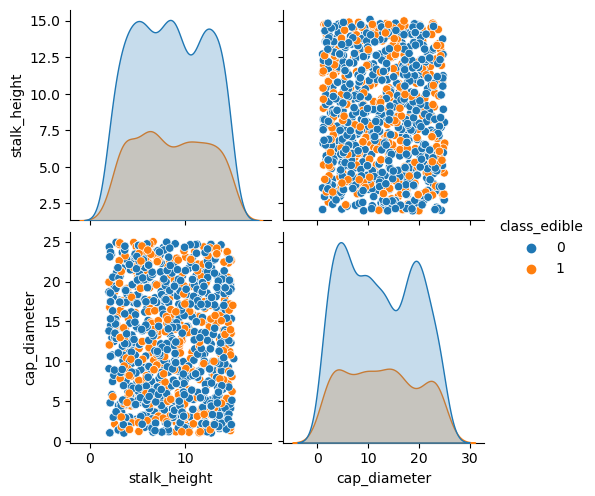

In [25]:
subset_features = ['stalk_height', 'cap_diameter']
subset_data = pd.concat([df1[subset_features], target], axis=1)
sns.pairplot(subset_data, hue='class_edible', diag_kind='kde')
plt.show()

In [29]:
## labeling for covrt catorical col to num
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()
y_train= lab_enc.fit_transform(y_train)
y_test= lab_enc.fit_transform(y_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
## SVM Implementation

In [31]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [32]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.1)

In [33]:
svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [34]:
y_pred=svc.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.86

In [36]:
confusion_matrix(y_test,y_pred)

array([[329,   0],
       [ 70, 101]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       329
           1       1.00      0.59      0.74       171

    accuracy                           0.86       500
   macro avg       0.91      0.80      0.82       500
weighted avg       0.88      0.86      0.85       500



In [38]:
params={'C':[1,2,3,4,5,6,10,12],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[0.1,0.2,0.3,0.4]}

In [39]:
grid_search= GridSearchCV(svc,params,verbose=2)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.0min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.1min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  41.7s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  37.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.4min
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   4.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   1.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.1s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   2.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   3.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0

In [ ]:
grid_search.best_params_